<a href="https://colab.research.google.com/github/ichiP245/TP-Anal-tica-Descriptiva/blob/main/notebooks/TP_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informacion sobre las variables
About this file
url: the url which fetches the data
id: the id of transaction
Lng: and Lat coordinates, using the BD09 protocol.
Cid: community id
tradeTime: the time of transaction
DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
followers: the number of people follow the transaction.
totalPrice: the total price
price: the average price by square
square: the square of house
livingRoom: the number of living room
drawingRoom: the number of drawing room
kitchen: the number of kitchen
bathroom the number of bathroom
floor: the height of the house. I will turn the Chinese characters to English in the next version.
buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
constructionTime: the time of construction
renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
elevator have ( 1 ) or not have elevator( 0 )
fiveYearsProperty: if the owner have the property for less than 5 years

#Hipotesis:
- Hipótesis 1: Los departamentos de menos ambientes presentan un precio por m² más alto que los de mayor tamaño.
- Hipótesis 2: La superficie es el factor principal del precio.
- Hipótesis 3: La condición de renovación tiene un gran impacto en el precio.
- Hipótesis 4: La cantidad de seguidores tiene una alta correlacion (en modulo) con el precio por m².
- Hipótesis 5: El impacto en el precio por m² de la cercania al metro es mas alta en departamentos chicos que grandes.

#Importacion de librerias

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox

#Ingesta de datos

In [29]:
df = pd.read_csv('new.csv',encoding='GBK')

/tmp/ipython-input-1052887524.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new.csv',encoding='GBK')


#Formato del data set

In [30]:
display(df.head())

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [31]:
display(df.shape)

(318851, 26)

In [32]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

None

#Estadisticos principales

In [33]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


#Analisis faltantes

Previo a analizar los faltantes, vamos a analizar variable por variable a ver si aparecen posibles nulos

In [34]:
for columna in df:
    print(columna)
    print(df[columna].unique())
    print()

url
['https://bj.lianjia.com/chengjiao/101084782030.html'
 'https://bj.lianjia.com/chengjiao/101086012217.html'
 'https://bj.lianjia.com/chengjiao/101086041636.html' ...
 'https://bj.lianjia.com/chengjiao/BJYZ92324217.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92333313.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92363553.html']

id
[101084782030 101086012217 101086041636 ... 'BJYZ92324217' 'BJYZ92333313'
 'BJYZ92363553']

Lng
[116.475489 116.453917 116.561978 ... 116.364322 116.399965 116.376828]

Lat
[40.01952  39.881534 39.877145 ... 39.933002 39.952619 39.93465 ]

Cid
[1111027376244 1111027381879 1111040862969 ... 1111027378919 1111027381192
 1111027381198]

tradeTime
['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

DOM
[1.464e+03 9.030e+02 1.271e+03 9.650e+02 9.270e+02 8.610e+02 8.510e+02
 9.040e+02 8.730e+02 8.650e+02 8.270e+02 7.730e+02 7.930e+02 7.840e+02
 7.060e+02 8.000e+02 7.390e+02 7.900e+02 6.910e+02 7.470e+02 6.900e+02
 6.970e+02 6.8

Como se puede ver aparecen muchos caracteres raros, vamos a analizar las filas que los contienen y los que no

In [44]:
pd.set_option('display.max_columns', None)
df[df['bathRoom'].isin([2006, 2003, 1990, 2000, 1996, 2005, 2011, '未知', 1994, 2004, '2003',])]

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92235,https://bj.lianjia.com/chengjiao/BJ0000615040....,BJ0000615040,116.117724,39.941152,1111052110644,2010-02-21,1.0,0,198.0,15729,125.89,#NAME?,中 14,3,2006,钢混结构,0.500,1,0,0,0.0,NaN,NaN,NaN,12,39492.0
92251,https://bj.lianjia.com/chengjiao/BJ0000615084....,BJ0000615084,116.121964,39.939762,1111027375862,2010-03-07,1.0,0,136.0,14601,93.15,#NAME?,中 15,4,2003,钢混结构,0.333,1,0,0,0.0,NaN,NaN,NaN,12,37588.0
92267,https://bj.lianjia.com/chengjiao/BJ0000615132....,BJ0000615132,116.118409,39.937888,1111043529456,2010-03-22,1.0,0,127.0,14613,86.91,#NAME?,中 16,4,2006,钢混结构,0.333,1,0,0,0.0,NaN,NaN,NaN,12,38753.0
92270,https://bj.lianjia.com/chengjiao/BJ0000615138....,BJ0000615138,116.111318,39.949921,1111027377794,2010-03-23,1.0,0,115.0,14240,80.76,#NAME?,中 6,4,2003,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92297,https://bj.lianjia.com/chengjiao/BJ0000615208....,BJ0000615208,116.117724,39.941152,1111052110644,2010-04-10,1.0,0,100.0,17242,58.00,#NAME?,高 14,3,2006,钢混结构,0.125,1,0,0,0.0,NaN,NaN,NaN,12,39492.0
92299,https://bj.lianjia.com/chengjiao/BJ0000615220....,BJ0000615220,116.111318,39.949921,1111027377794,2010-04-13,1.0,0,205.0,13021,157.44,#NAME?,顶 6,4,2006,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92300,https://bj.lianjia.com/chengjiao/BJ0000615222....,BJ0000615222,116.118409,39.937888,1111043529456,2010-04-13,1.0,0,146.5,15985,91.65,#NAME?,中 16,4,2006,钢混结构,0.500,1,0,0,0.0,NaN,NaN,NaN,12,38753.0
92304,https://bj.lianjia.com/chengjiao/BJ0000615229....,BJ0000615229,116.117019,39.933860,1111052073923,2010-04-17,1.0,0,90.0,14288,62.99,#NAME?,中 6,4,1990,混合结构,0.333,0,0,0,0.0,NaN,NaN,NaN,12,39381.0
92340,https://bj.lianjia.com/chengjiao/BJ0000615401....,BJ0000615401,116.122354,39.937384,1111027376723,2010-09-09,1.0,0,130.0,17640,73.70,#NAME?,低 6,4,2000,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36358.0
92349,https://bj.lianjia.com/chengjiao/BJ0000615438....,BJ0000615438,116.117724,39.941152,1111052110644,2010-09-29,1.0,0,109.5,17484,62.63,#NAME?,中 14,3,2006,钢混结构,0.125,1,0,0,0.0,NaN,NaN,NaN,12,39492.0


In [53]:
df1 = df.loc[~df['bathRoom'].isin([2006, 2003, 1990, 2000, 1996, 2005, 2011, '未知', 1994, 2004, '2003',])]
print(df1['livingRoom'].unique())
print(df1['drawingRoom'].unique())
print(df1['buildingType'].unique())
print(df1['floor'].unique())


[2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '8']
[1 2 0 4 3 5 '0' '1' '2' '3' '4' '5']
[ 1.  4.  3. nan  2.]
['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13'
 '底 10' '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21' '高 7'
 '中 22' '底 1' '中 7' '底 8' '顶 15' '中 18' '高 28' '顶 14' '顶 13' '低 20' '底 26'
 '低 17' '顶 24' '底 23' '顶 3' '顶 21' '底 24' '高 30' '高 11' '底 25' '高 27'
 '底 9' '低 11' '低 28' '低 15' '顶 26' '低 34' '顶 12' '中 25' '高 8' '底 17'
 '高 32' '高 19' '底 7' '顶 28' '顶 9' '高 31' '中 26' '顶 2' '顶 8' '底 32' '中 42'
 '底 30' '低 32'

Se puede ver que todas las filas que tienen caracteres raros, muchas de las columnas tienen valores sin sentido como bathRoom siendo un año, livingRoom siendo #NAME, drawingRoom con simbolos raros, floor sinedo letras y buildingType no siendo un entero como corresponde. En cambio cuando vemos el dataset sin estas filas, todos los valores quedan con el mismo formato y sin caracteres raros a excepcion de floor que la investigaremos luego. Por lo que, vamos a truncar todas las filas con esos caracteres raros.

In [54]:
df = df1

Hacemos el mimso analisis pero sin las filas eliminadas

In [56]:
for columna in df:
    print(columna)
    print(df[columna].unique())
    print()

url
['https://bj.lianjia.com/chengjiao/101084782030.html'
 'https://bj.lianjia.com/chengjiao/101086012217.html'
 'https://bj.lianjia.com/chengjiao/101086041636.html' ...
 'https://bj.lianjia.com/chengjiao/BJYZ92324217.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92333313.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92363553.html']

id
[101084782030 101086012217 101086041636 ... 'BJYZ92324217' 'BJYZ92333313'
 'BJYZ92363553']

Lng
[116.475489 116.453917 116.561978 ... 116.364322 116.399965 116.376828]

Lat
[40.01952  39.881534 39.877145 ... 39.933002 39.952619 39.93465 ]

Cid
[1111027376244 1111027381879 1111040862969 ... 1111027378919 1111027381192
 1111027381198]

tradeTime
['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

DOM
[1.464e+03 9.030e+02 1.271e+03 9.650e+02 9.270e+02 8.610e+02 8.510e+02
 9.040e+02 8.730e+02 8.650e+02 8.270e+02 7.730e+02 7.930e+02 7.840e+02
 7.060e+02 8.000e+02 7.390e+02 7.900e+02 6.910e+02 7.470e+02 6.900e+02
 6.970e+02 6.8

Se puede ver que hay variables que tienen distintos tipos de datos, en DOM y en buildingType aparece el valor nan y en constructionTime aparece '未知' que al traducirlo significa desconocido.

In [60]:
display(df[['DOM','buildingType']].isna().sum())
display(df['DOM'].value_counts())
df['buildingType'].value_counts()


,0
DOM,157970
buildingType,2021


,count
DOM,
1.0,69137
5.0,2352
4.0,2317
3.0,2313
6.0,2194
7.0,2166
2.0,2152
8.0,2123
9.0,2070


,count
buildingType,
4.0,172405
1.0,84541
3.0,59715
2.0,137


en DOM y en buildingType aparece el valor nan al hacer .unique() pero son datos que realmente son NaN para el programa.

In [62]:
pd.reset_option('display.max_rows')
df[df['constructionTime']=='未知']

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
41,https://bj.lianjia.com/chengjiao/101088892742....,101088892742,116.232365,40.235529,1111027380837,2016-08-03,546.0,6,170.0,22078,77.00,2,1,1,1,低 6,4.0,未知,1,2,0.333,0.0,1.0,0.0,6,35347.0
82,https://bj.lianjia.com/chengjiao/101089360053....,101089360053,116.249496,40.221791,1111027378945,2016-07-26,457.0,4,360.0,24507,146.90,3,2,1,2,低 7,4.0,未知,4,2,0.500,0.0,1.0,0.0,6,37612.0
101,https://bj.lianjia.com/chengjiao/101089448850....,101089448850,116.523870,39.923283,1111027374597,2016-07-16,430.0,3,470.0,32794,143.32,1,0,0,0,中 32,1.0,未知,3,6,0.500,1.0,1.0,1.0,7,30864.0
158,https://bj.lianjia.com/chengjiao/101089726827....,101089726827,116.430012,40.066244,1111027380045,2016-10-31,487.0,52,580.0,20579,281.85,5,2,1,3,底 6,4.0,未知,3,2,0.500,0.0,1.0,0.0,6,39940.0
160,https://bj.lianjia.com/chengjiao/101089729474....,101089729474,116.520858,39.918846,1111027377634,2016-07-28,392.0,222,330.0,29483,111.93,3,2,1,1,顶 6,4.0,未知,2,2,0.500,0.0,1.0,1.0,7,56752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318825,https://bj.lianjia.com/chengjiao/BJYZ92198713....,BJYZ92198713,116.508181,39.807662,1111027374693,2016-06-04,NaN,9,70.0,20984,33.36,1,0,1,1,中 23,1.0,未知,3,6,0.200,1.0,0.0,1.0,3,28609.0
318828,https://bj.lianjia.com/chengjiao/BJYZ92209519....,BJYZ92209519,116.497474,39.810115,1111027377957,2016-06-10,1.0,7,98.5,27218,36.19,1,0,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0
318833,https://bj.lianjia.com/chengjiao/BJYZ92225970....,BJYZ92225970,116.497474,39.810115,1111027377957,2016-05-22,1.0,3,147.0,26602,55.26,1,1,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0
318839,https://bj.lianjia.com/chengjiao/BJYZ92258549....,BJYZ92258549,116.497474,39.810115,1111027377957,2016-05-28,1.0,1,145.0,26221,55.30,1,1,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0


Consideramos que el hecho de que no se conoce el año de construccion es algo importante y que seguramente se deba a que son edificios antiguos. Por lo que una buena solucion es a estos datos es aplicarle KNN. Los vamos a transformar a nulos ya que no hay otros valores nulos. Por lo que un nulo en constructionTime ahora significa que es desconocido.

In [71]:
#transformamos a nan los valores con '未知'
df['constructionTime'] = df['constructionTime'].replace('未知', np.nan)

In [73]:
columnas_faltantes = []
print('Columna, cantidad de faltantes, porcentaje del total')

for columna in df:

    total = len(df[columna])
    cant_faltantes = df[columna].isna().sum()

    if cant_faltantes > 0:
        columnas_faltantes.append(columna)
        print(columna, cant_faltantes, cant_faltantes/total, sep=', ')

Columna, cantidad de faltantes, porcentaje del total
DOM, 157970, 0.49548489895520653
buildingType, 2021, 0.00633901994548631
constructionTime, 19283, 0.0604825935719013
communityAverage, 463, 0.0014522346535181404


Convertimos los datos a su tipo correcto

In [79]:
df['id'] = df['id'].astype(str)
df['tradeTime'] = pd.to_datetime(df['tradeTime'])
df['livingRoom'] = df['livingRoom'].astype(int)
df['drawingRoom'] = df['drawingRoom'].astype(int)
df['bathRoom'] = df['bathRoom'].astype(int)
df['buildingType'] = df['buildingType'].astype(float)
df['constructionTime'] = df['constructionTime'].astype(float)

In [80]:
for columna in df:
    print(columna)
    print(df[columna].unique())
    print()

url
['https://bj.lianjia.com/chengjiao/101084782030.html'
 'https://bj.lianjia.com/chengjiao/101086012217.html'
 'https://bj.lianjia.com/chengjiao/101086041636.html' ...
 'https://bj.lianjia.com/chengjiao/BJYZ92324217.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92333313.html'
 'https://bj.lianjia.com/chengjiao/BJYZ92363553.html']

id
['101084782030' '101086012217' '101086041636' ... 'BJYZ92324217'
 'BJYZ92333313' 'BJYZ92363553']

Lng
[116.475489 116.453917 116.561978 ... 116.364322 116.399965 116.376828]

Lat
[40.01952  39.881534 39.877145 ... 39.933002 39.952619 39.93465 ]

Cid
[1111027376244 1111027381879 1111040862969 ... 1111027378919 1111027381192
 1111027381198]

tradeTime
<DatetimeArray>
['2016-08-09 00:00:00', '2016-07-28 00:00:00', '2016-12-11 00:00:00',
 '2016-09-30 00:00:00', '2016-08-28 00:00:00', '2016-07-22 00:00:00',
 '2016-07-14 00:00:00', '2016-09-07 00:00:00', '2016-09-04 00:00:00',
 '2016-09-05 00:00:00',
 ...
 '2011-06-03 00:00:00', '2011-08-08 00:00:00', '2011-03-

Identificamos que el precio esta reducido a 10 miles. Por lo que lo volvemos a calcular a partir del precio por square y el square.

In [22]:
df[['price','totalPrice','square']]

,price,totalPrice,square
0,31680,415.0,131.00
1,43436,575.0,132.38
2,52021,1030.0,198.00
3,22202,297.5,134.00
4,48396,392.0,81.00
...,...,...,...
318846,20580,350.0,170.07
318847,31006,108.8,35.09
318848,35138,359.0,102.17
318849,40373,720.0,178.34


In [82]:
df['totalPrice'] = df['price']*df['square']

In [83]:
df[['price','totalPrice','square']]

,price,totalPrice,square
0,31680,4150080.00,131.00
1,43436,5750057.68,132.38
2,52021,10300158.00,198.00
3,22202,2975068.00,134.00
4,48396,3920076.00,81.00
...,...,...,...
318846,20580,3500040.60,170.07
318847,31006,1088000.54,35.09
318848,35138,3590049.46,102.17
318849,40373,7200120.82,178.34


#Analisis de duplicados

In [86]:
df.duplicated().sum()

np.int64(0)

Se puede ver que no hay registros enteros duplicados. Verificamos ahora si hay 2 con mimso ID.

In [87]:
df['id'].duplicated().sum()

np.int64(0)

Comprobamos que no hay duplicados

#Analisis de outliers

In [90]:
def outliers(df, column):

  print(column)

  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Primer gráfico: histograma
  axs[0].hist(df[column], bins=30, edgecolor="black", alpha=0.7)
  axs[0].set_title('Histograma')
  axs[0].set_xlabel("Valor")
  axs[0].set_ylabel("Frecuencia")

  # Segundo gráfico: boxplot
  axs[1].boxplot(df[column].dropna())
  axs[1].set_title("Boxplot")
  axs[1].set_ylabel("Valor")

  plt.tight_layout()
  plt.show()

  q1 = np.nanpercentile(df[column], 25)
  q3 = np.nanpercentile(df[column], 75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower) | (df[column] > upper)]
  print("Outliers:")
  print(len(outliers),end="\n\n")
  return len(outliers)

In [91]:
def outliers_bc(df,column):

  print(column)

  x= df[column].dropna()
  jb = stats.jarque_bera(x)          # Test de normalidad (asimetría + curtosis)
  print('jarque bera', jb.pvalue)

  if jb.pvalue <= 0.05:
    # obtener minimo valor de la columna
    minimo = x.min()
    # Aplicar Box-Cox para transformar la columna
    if minimo <= 0: #esto debido a que boxcox trabaja solo con positivos
      data_bc,lambda_bc = boxcox(x.apply(lambda x: x-minimo+0.00001)) #desplazo la columna hasta ser positiva, sumo ese decimal ya que sino puede quedar en 0
    else:
      data_bc,lambda_bc = boxcox(x)
    print('transformado con boxcox. lambda:',lambda_bc)
    # unir x con data_bc manteniendo el indice de x
    data_bc = pd.DataFrame(data_bc, index=x.index)
    # agregar columna data_bc a mi df donde coinciden los indices
    df[f'{column}_boxcox'] = data_bc
    cantidad=outliers(df, f'{column}_boxcox')

  else:
    cantidad=outliers(df, column)
  return cantidad

Lng
jarque bera 0.0
transformado con boxcox. lambda: -96.88012987076434
Lng_boxcox


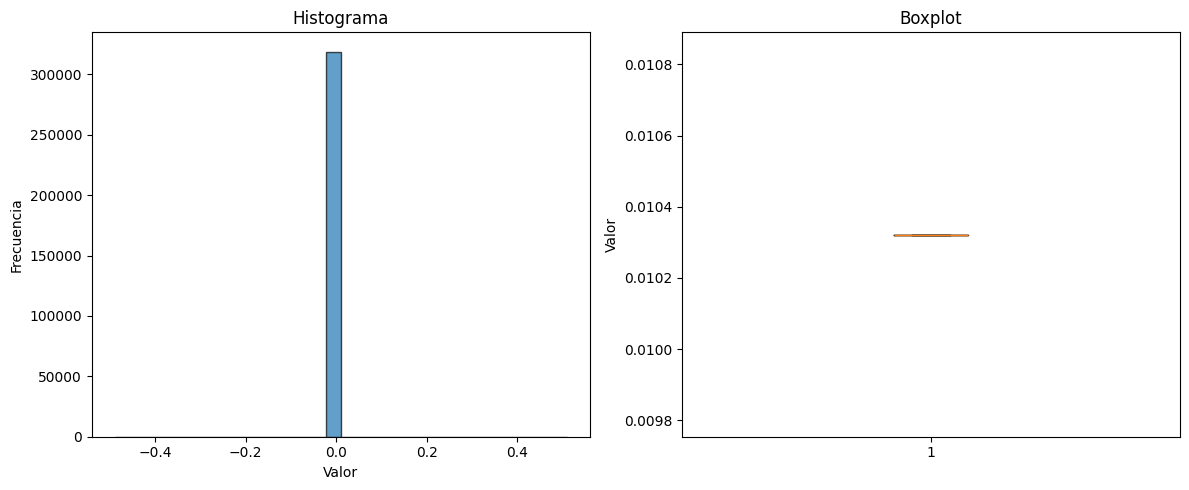

Outliers:
0

Lat
jarque bera 0.0
transformado con boxcox. lambda: -30.72714265604124
Lat_boxcox


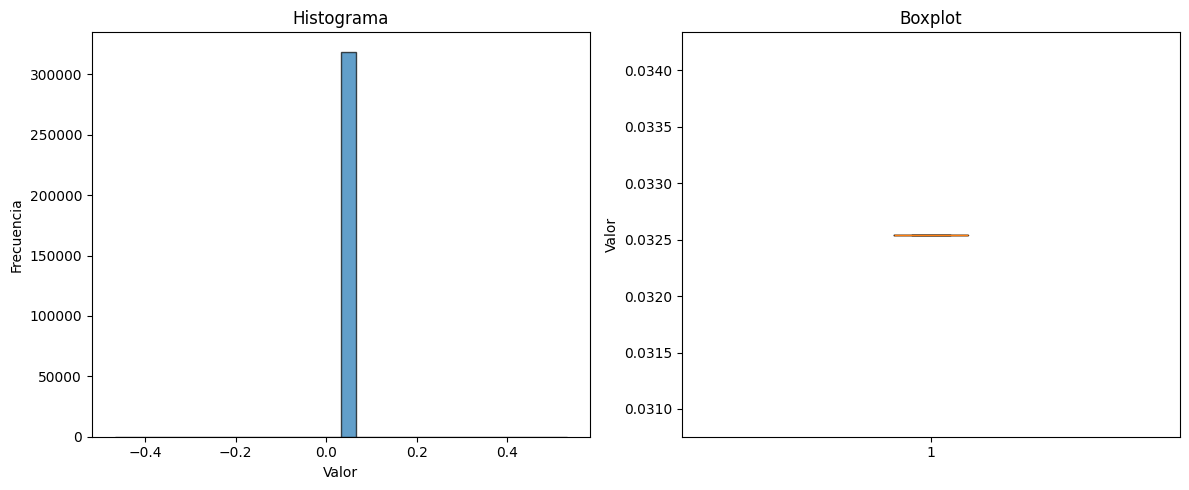

Outliers:
0

Cid
jarque bera 0.0
transformado con boxcox. lambda: -1357.0117146173257
Cid_boxcox


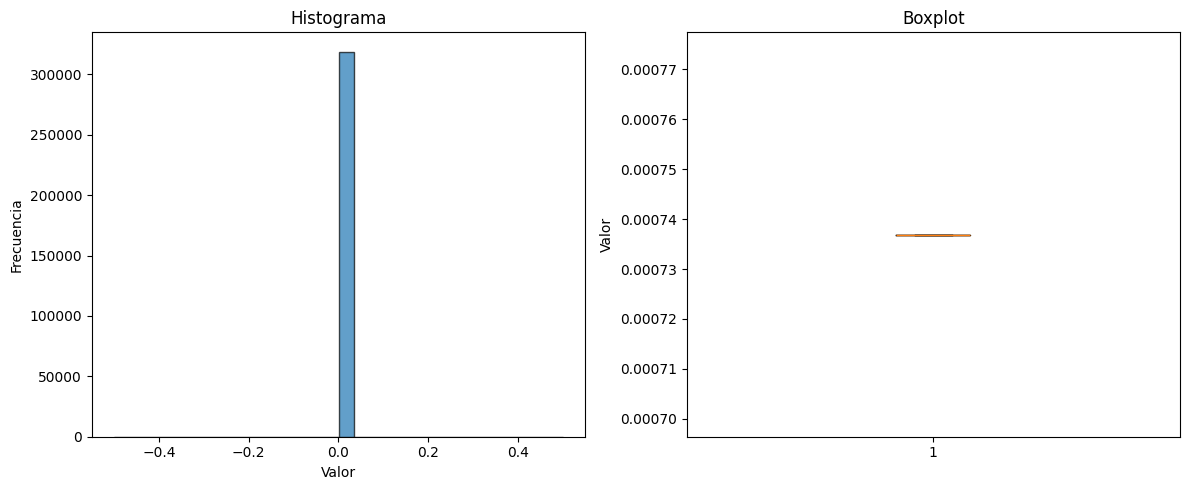

Outliers:
0

DOM
jarque bera 0.0
transformado con boxcox. lambda: -0.12821278473088676
DOM_boxcox


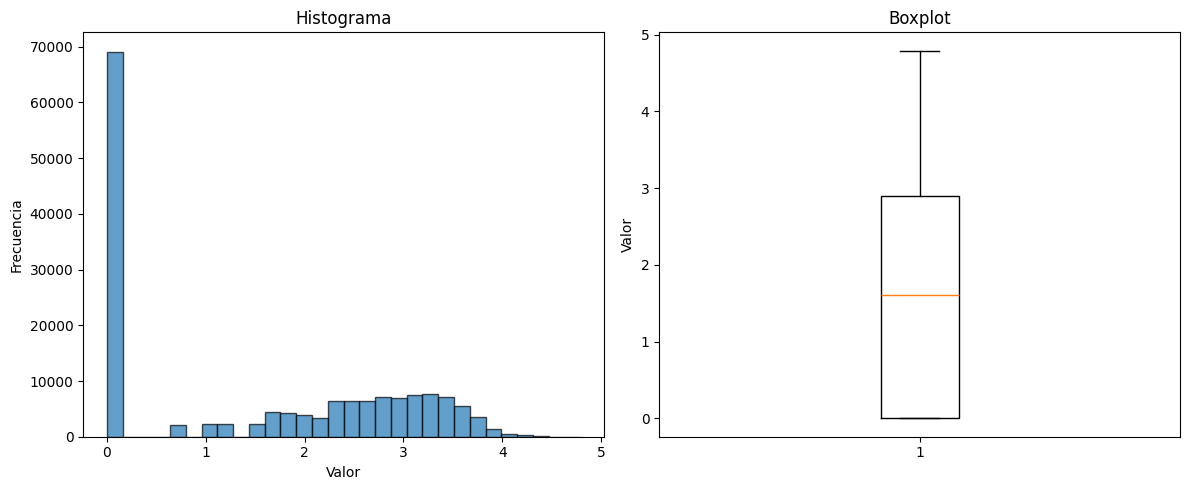

Outliers:
0

followers
jarque bera 0.0
transformado con boxcox. lambda: 0.149391321448533
followers_boxcox


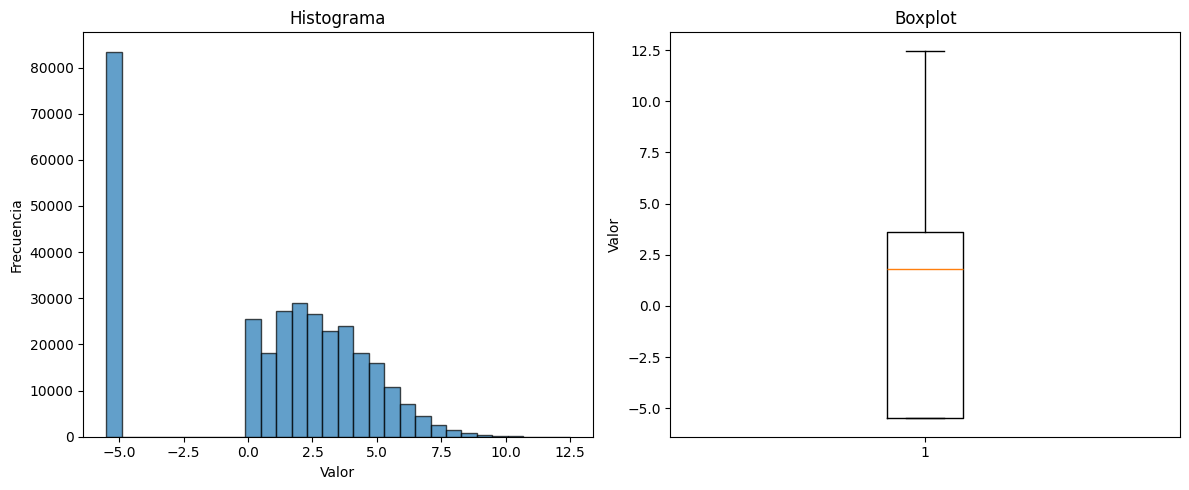

Outliers:
0

totalPrice
jarque bera 0.0
transformado con boxcox. lambda: 0.20548978448927166
totalPrice_boxcox


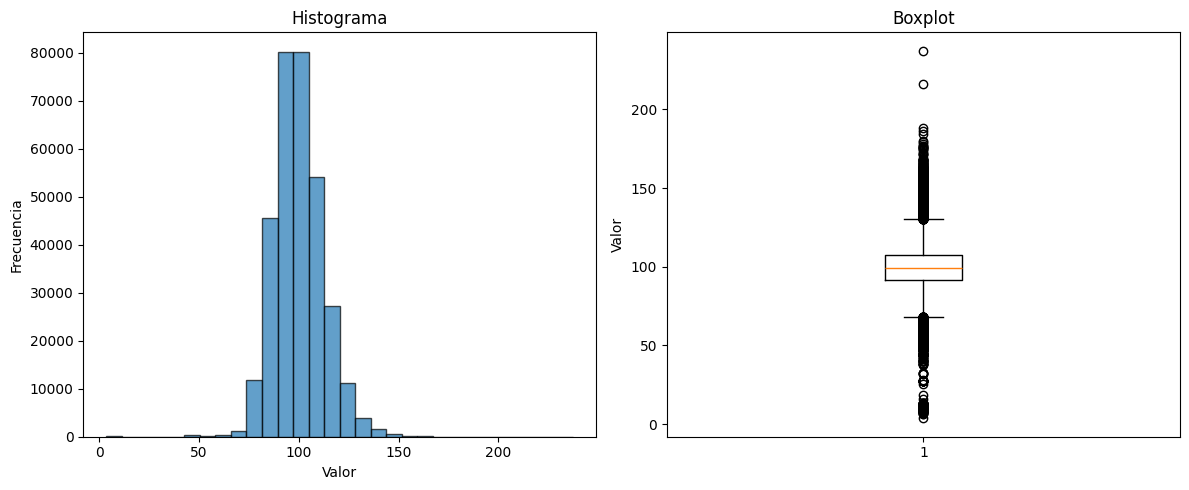

Outliers:
6082

price
jarque bera 0.0
transformado con boxcox. lambda: 0.32144332584298846
price_boxcox


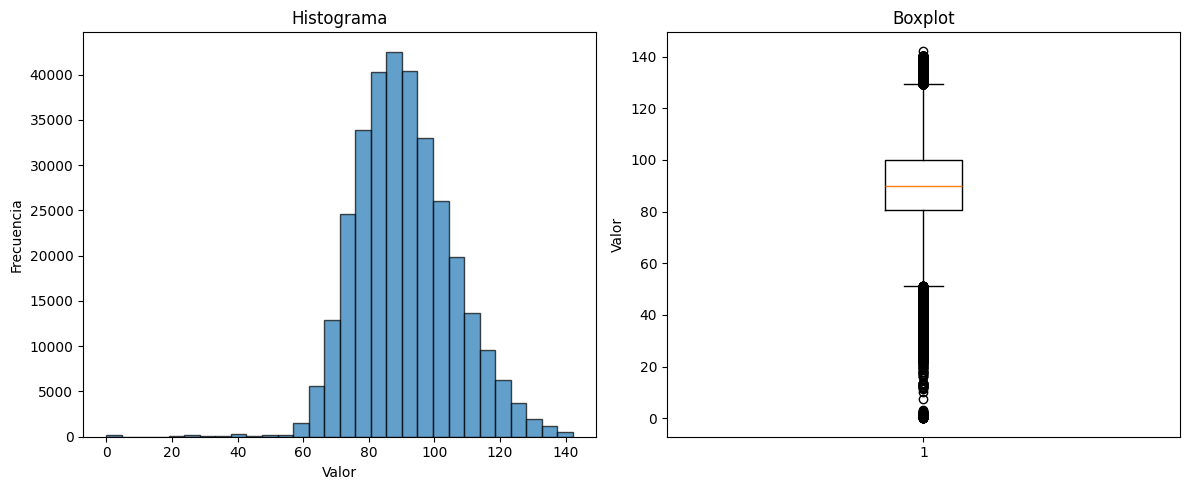

Outliers:
4116

square
jarque bera 0.0
transformado con boxcox. lambda: -0.18610300172203825
square_boxcox


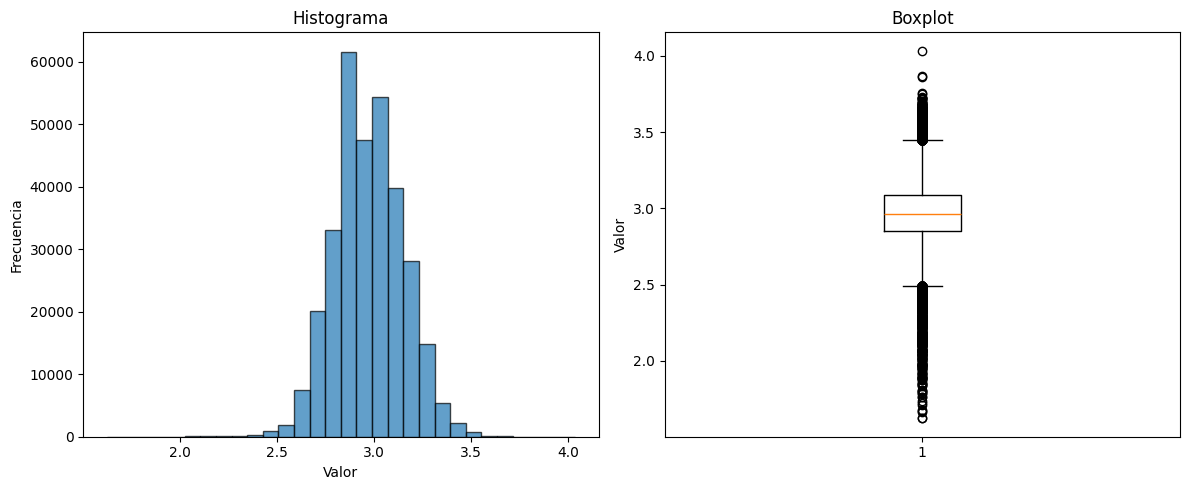

Outliers:
2833

livingRoom
jarque bera 0.0
transformado con boxcox. lambda: 0.4278194902119979
livingRoom_boxcox


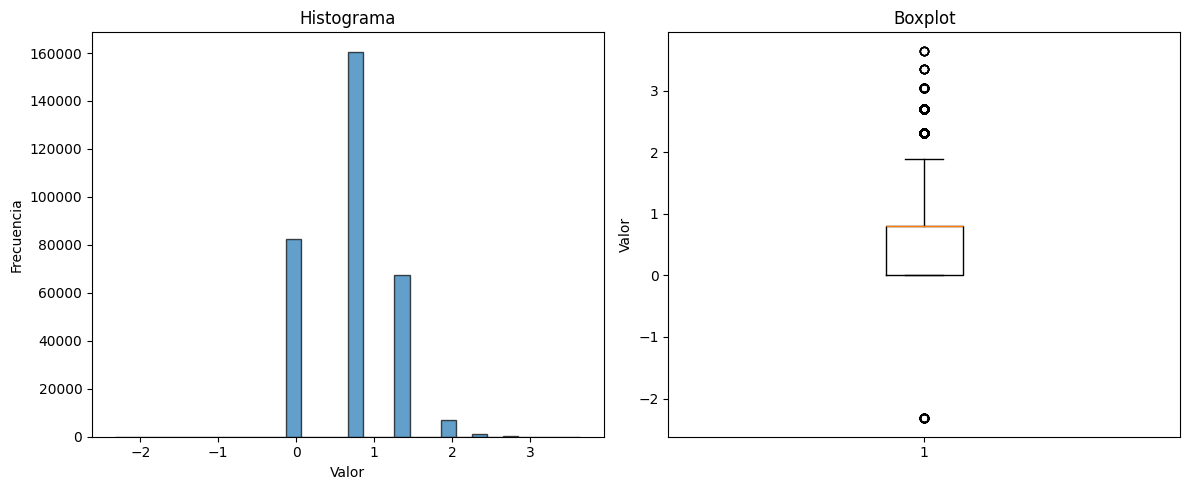

Outliers:
1412

drawingRoom
jarque bera 0.0
transformado con boxcox. lambda: 0.6540634648352491
drawingRoom_boxcox


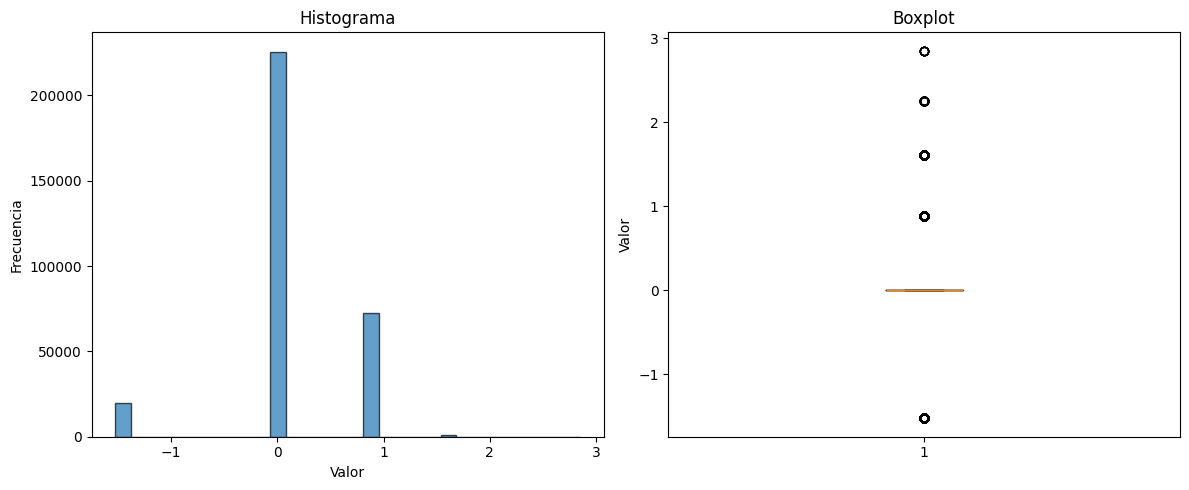

Outliers:
93160

kitchen
jarque bera 0.0
transformado con boxcox. lambda: 1.458007261638877
kitchen_boxcox


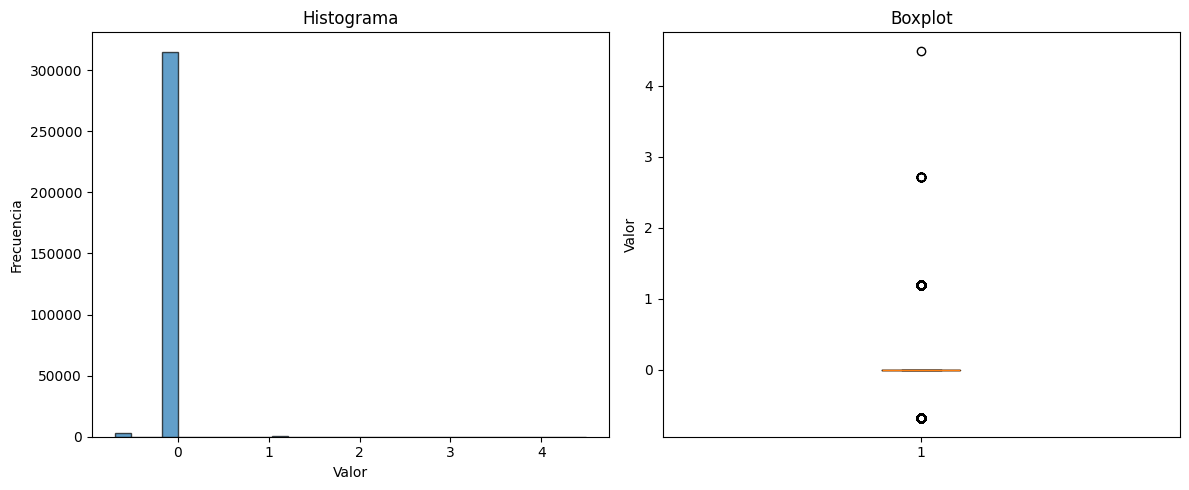

Outliers:
3531

bathRoom
jarque bera 0.0
transformado con boxcox. lambda: 0.432932505098867
bathRoom_boxcox


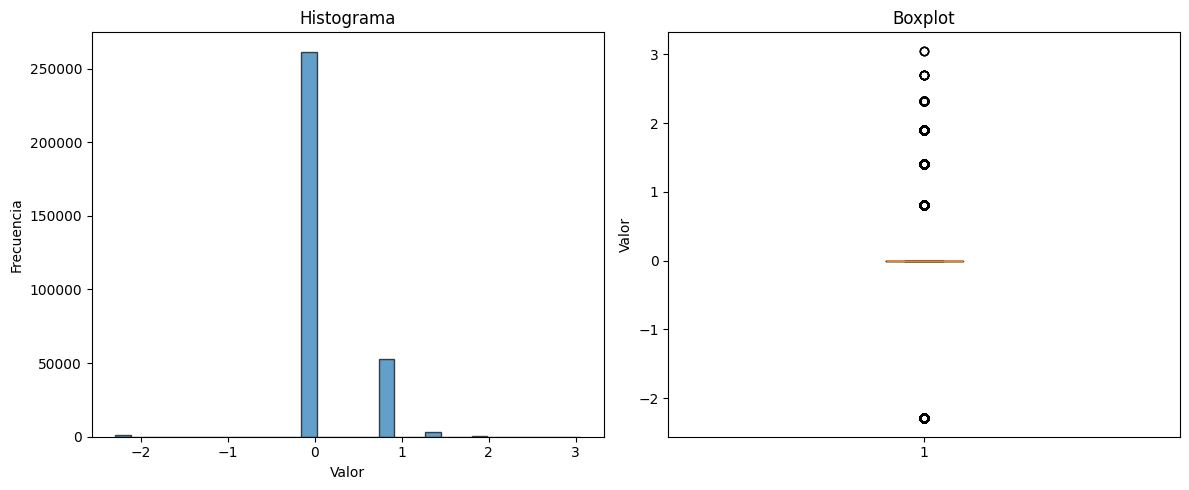

Outliers:
57331

buildingType
jarque bera 0.0
transformado con boxcox. lambda: 1.7551173074015707
buildingType_boxcox


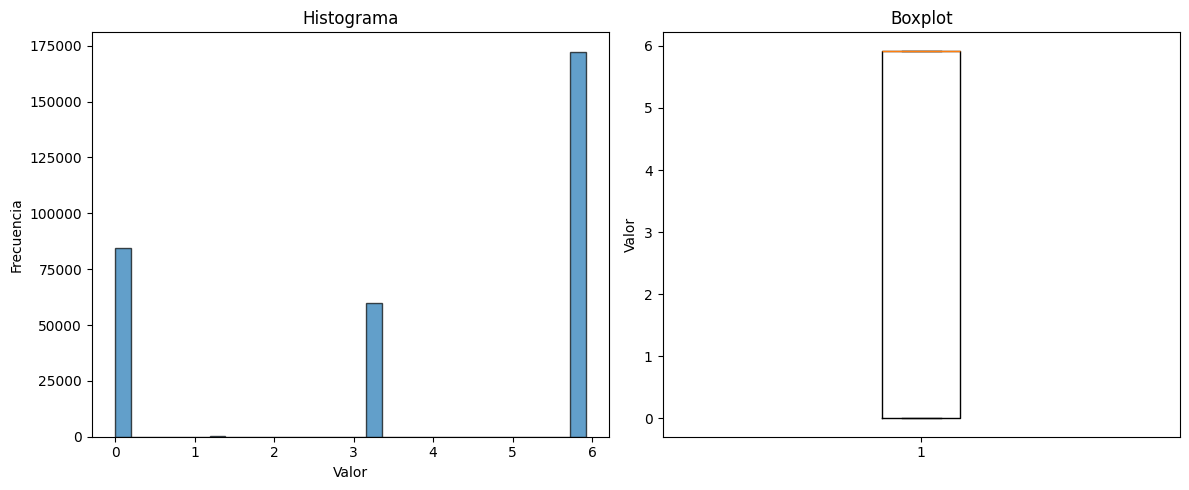

Outliers:
0

constructionTime
jarque bera 0.0
transformado con boxcox. lambda: 79.16053972430485
constructionTime_boxcox


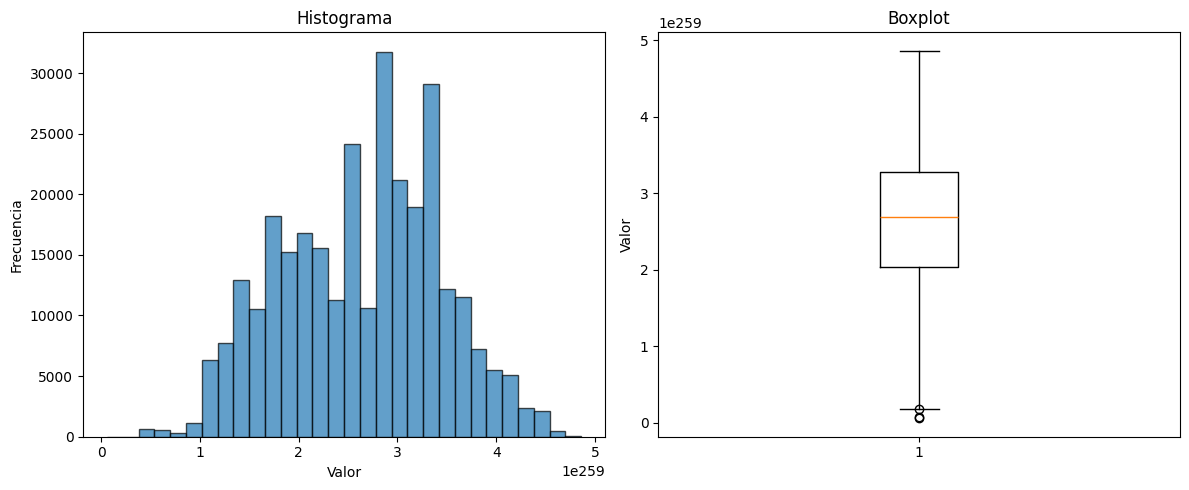

Outliers:
3

renovationCondition
jarque bera 0.0
transformado con boxcox. lambda: 0.7533194058186066
renovationCondition_boxcox


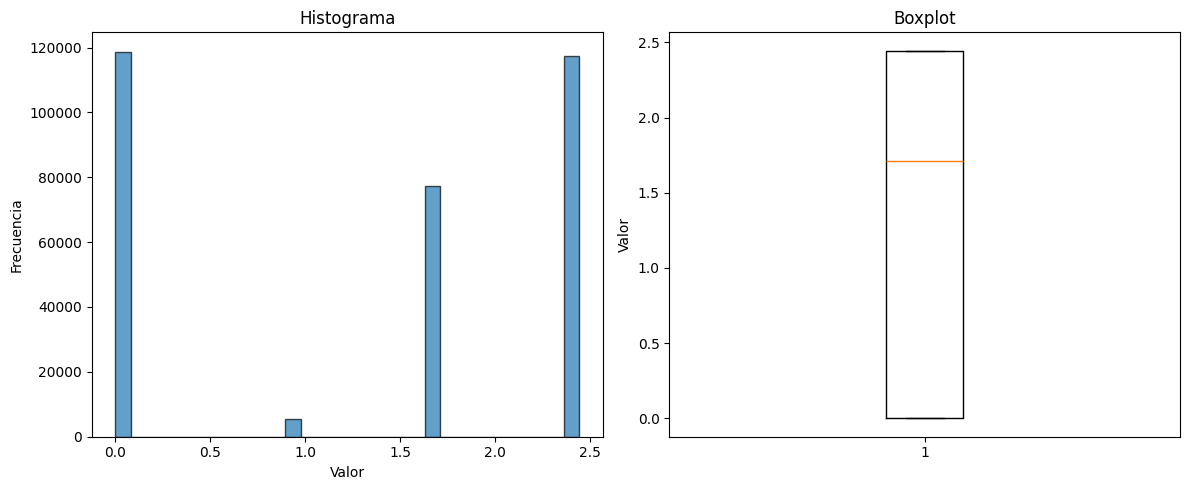

Outliers:
0

buildingStructure
jarque bera 0.0
transformado con boxcox. lambda: 1.3033355964070685
buildingStructure_boxcox


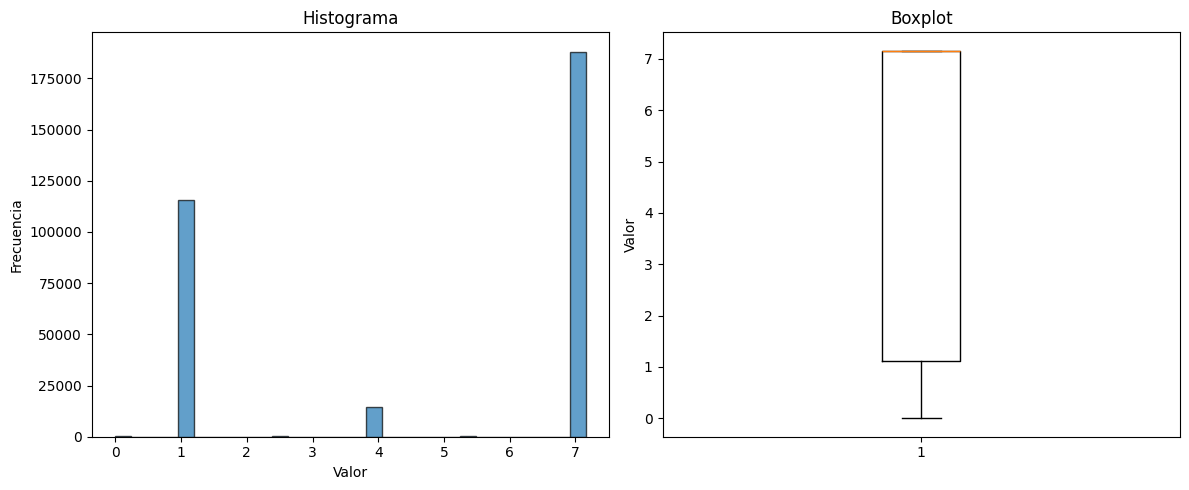

Outliers:
0

ladderRatio
jarque bera 0.0
transformado con boxcox. lambda: 0.0461568514201114
ladderRatio_boxcox


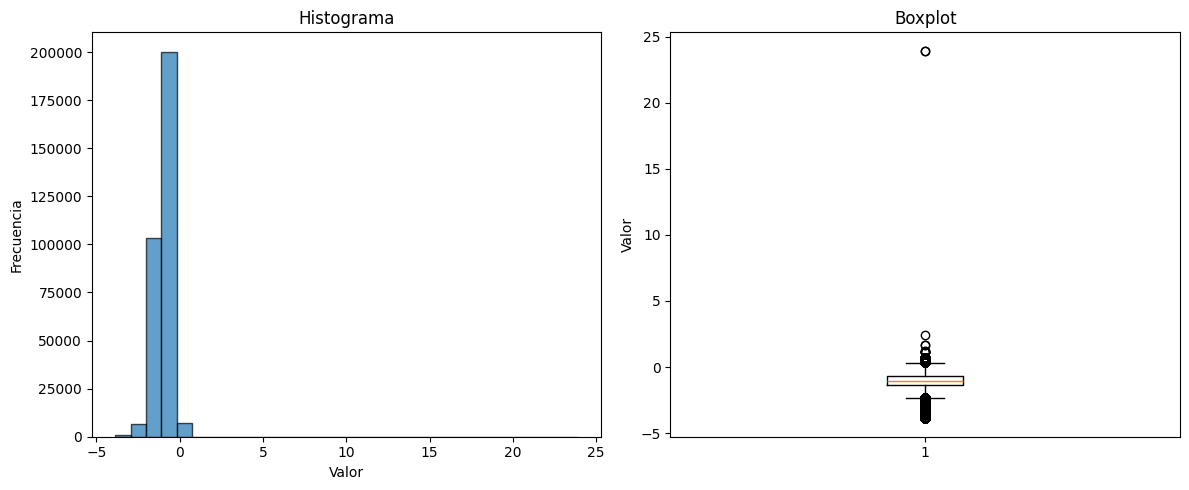

Outliers:
4492

elevator
jarque bera 0.0
transformado con boxcox. lambda: 0.08148530364807804
elevator_boxcox


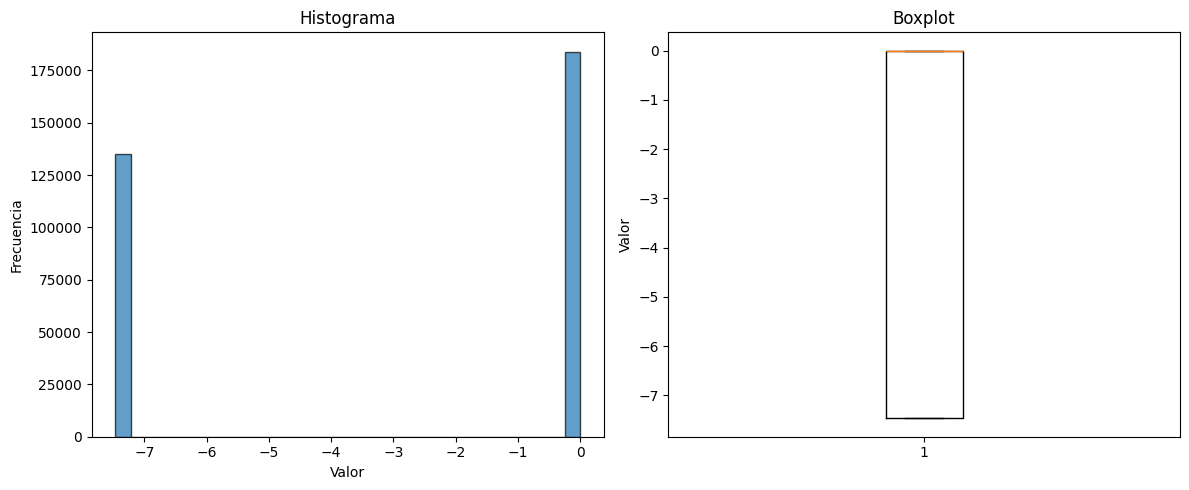

Outliers:
0

fiveYearsProperty
jarque bera 0.0
transformado con boxcox. lambda: 0.16015974260968138
fiveYearsProperty_boxcox


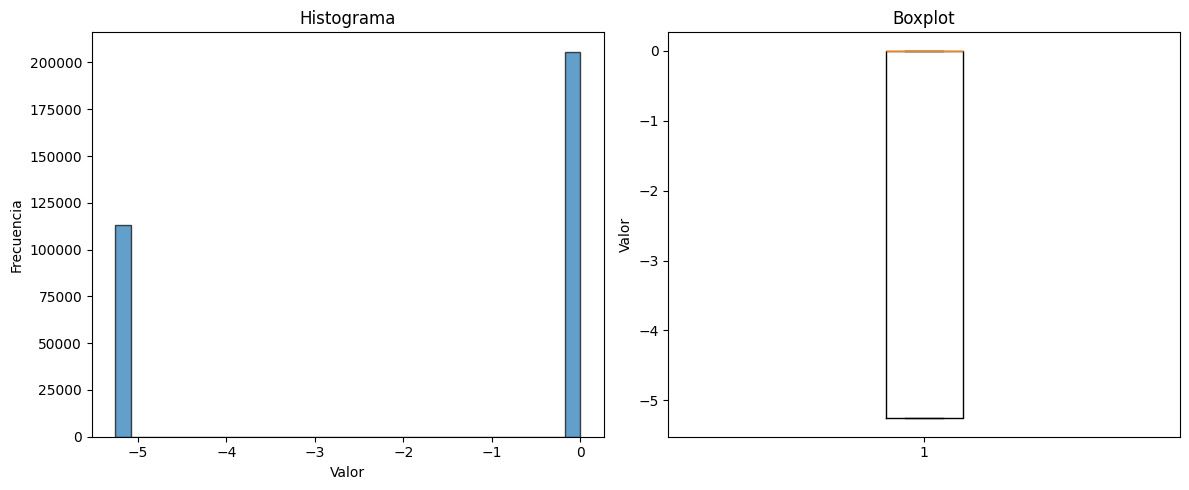

Outliers:
0

subway
jarque bera 0.0
transformado con boxcox. lambda: 0.10807992120589681
subway_boxcox


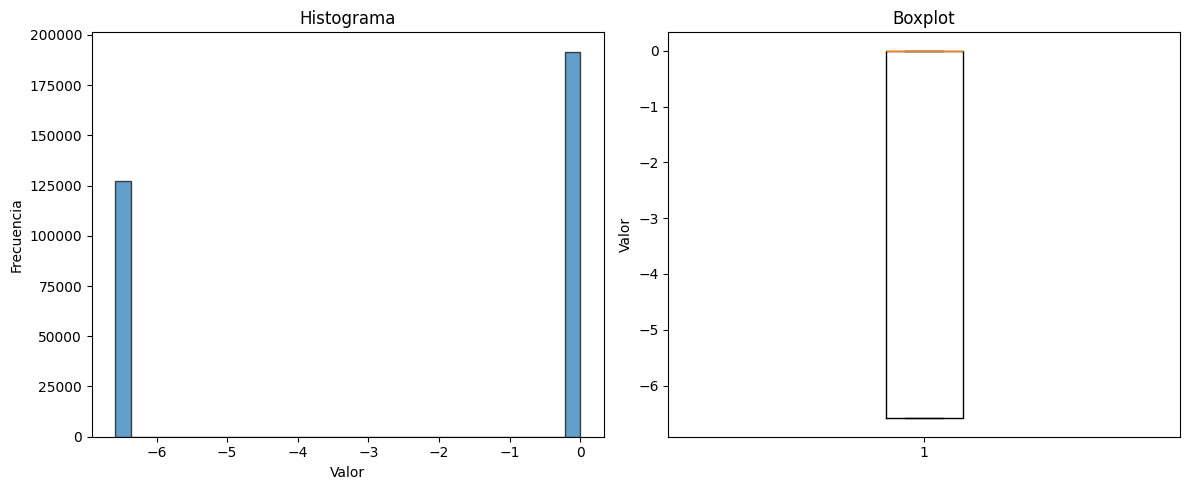

Outliers:
0

district
jarque bera 0.0
transformado con boxcox. lambda: 1.1104714027010776
district_boxcox


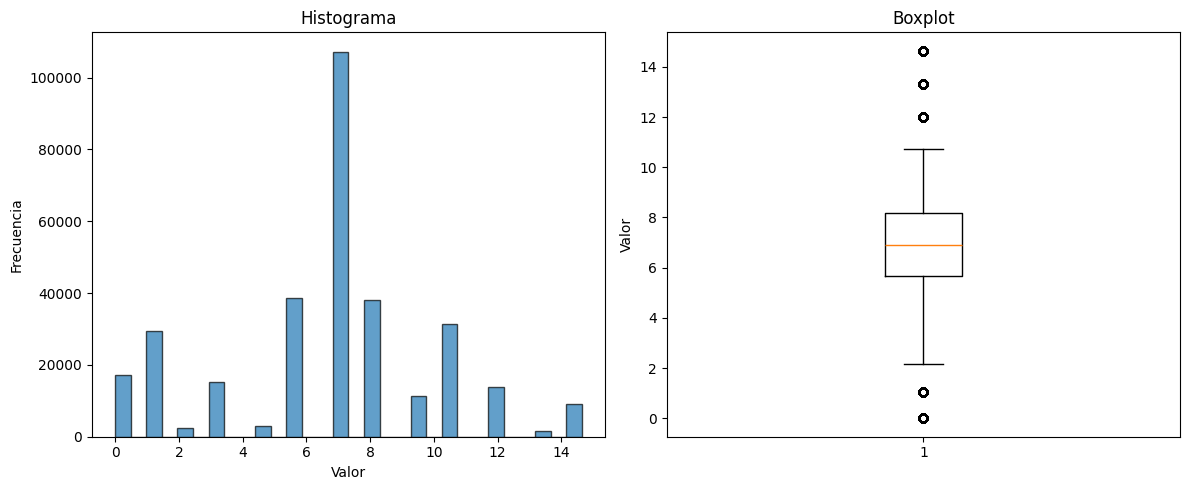

Outliers:
71278

communityAverage
jarque bera 0.0
transformado con boxcox. lambda: -0.3165039972273981
communityAverage_boxcox


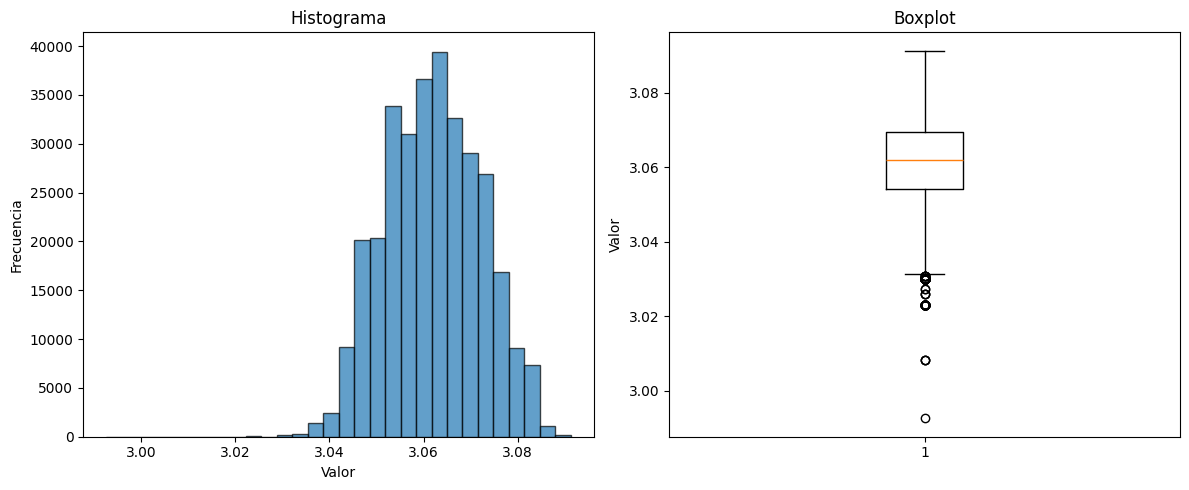

Outliers:
231



In [94]:
cantidad_outliers = []

for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype=='float64':
    cantidad=outliers_bc(df, column)
    cantidad_outliers.append(cantidad)

Escribir algo

In [98]:
len(df['Cid'].unique())

4035

#Agregar cercania a transporte publico con la hipotesis